In [2]:
import os
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils import *
from cVAE_utils import *
from cVAE_trainer import *

/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user

# KL-ALL-1_1_0.01-10

In [3]:
alpha=250000
beta=1
gamma=0.01

In [4]:
state_dict_path = "3DcVAE_asd-UKBB604-dim32/KL_annealing-ALL-train_480-val_120-HP-alpha_250000-beta_1-gamma_0.01-batch_size_10/model_final.pth"
state_dict = torch.load(state_dict_path)

In [5]:
train_history = state_dict["train_info_history"]
val_history = state_dict["val_info_history"]

print(state_dict.keys())
print(train_history.keys())
print(val_history.keys())

dict_keys(['model', 'optimizer', 'epoch', 'best_loss', 'bad_epochs', 'val_info_history', 'train_info_history'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss', 'v_acc', 'v_bar_acc', 'v_score_mean', 'v_bar_score_mean'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss', 'ss', 'ss-plot', 'v_acc', 'v_bar_acc', 'v_score_mean', 'v_bar_score_mean'])


## adjust epoch num

In [6]:
min_step = 0
patience = 12
val_info_history = val_history["loss"]

In [7]:
best = val_info_history[0]
bad = 0
for epoch, loss in enumerate(val_info_history):
    if loss < best:
        if best - loss < min_step:
            bad += 1
        else:
            bad = 0
        best = loss
    else:
        bad +=1

    if bad >= patience:
        break
        
print(epoch)
max_epoch = epoch+1

336


## train/val loss + ss

In [30]:
loss_train = train_history["loss"]
loss_val = val_history["loss"]
ss_plot = val_history["ss"]
epochs = np.arange(0, len(loss_train))

print(len(loss_train))
print(len(loss_val))
print(len(ss_plot))
print(len(epochs))

print(loss_train[347:353])
print(loss_val[347:353])
print(ss_plot[347:353])
print()

print(loss_val[384])
print()

print(loss_train[299], loss_train[325])
print(loss_val[299], loss_val[325])
print(ss_plot[299], ss_plot[325])
print()

print(ss_plot[384])

415
415
415
415
[7061.619140625, 7062.16162109375, 9.480136589242794e+18, 7195272274771968.0, 44869951160320.0, 44105916743680.0]
[7067.3837890625, 7069.41357421875, 3.109023026135221e+34, 89746093113344.0, 107220855422976.0, 77994777378816.0]
[-0.016460972, -0.015638236, -0.056194164, -0.070061654, -0.07150925, -0.07216393]

3406.97216796875

7063.9052734375 7062.3525390625
7069.9443359375 7069.0419921875
-0.041606523 -0.035295773

-0.06984559


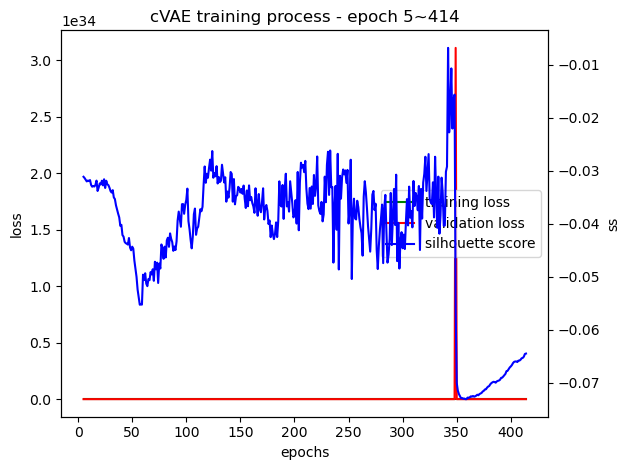

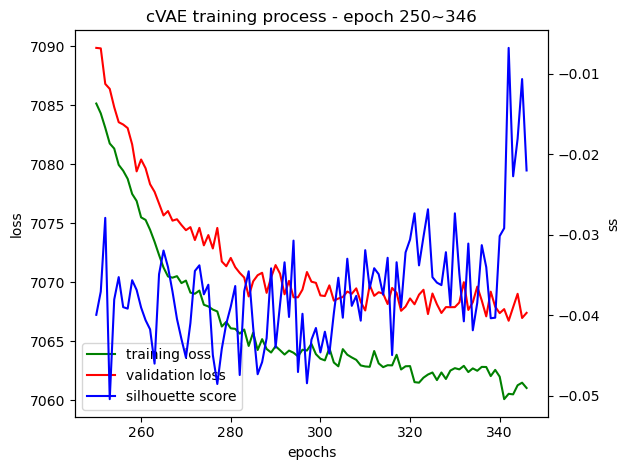

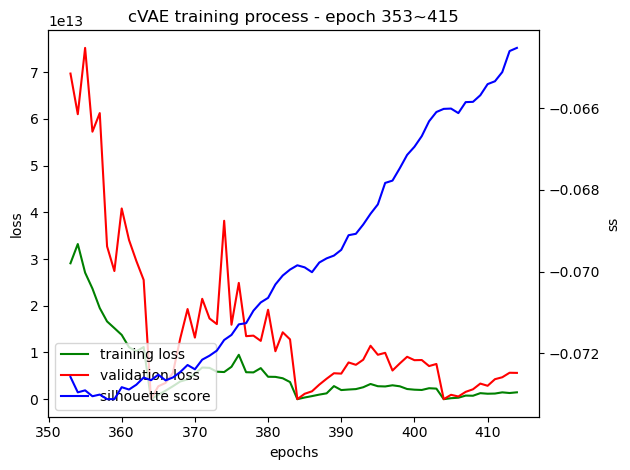

In [9]:
## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=7)

plt.title(f'cVAE training process - epoch {left}~{right-1}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 250
right = 347

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

plt.title(f'cVAE training process - epoch {left}~{right-1}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 353
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

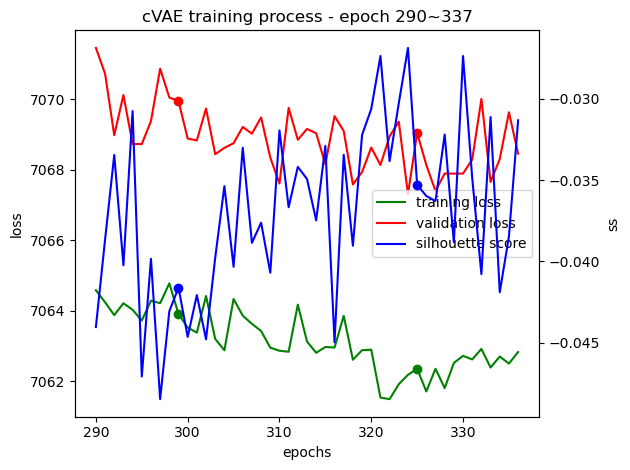

In [10]:
# use 299 instead of 324 QAQ
## ---------------------------------------------------------------
left = 290
right = max_epoch

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=7)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

ax1.scatter(epochs[299], loss_train[299], color='g')
ax1.scatter(epochs[299], loss_val[299], color='r')
ax2.scatter(epochs[299], ss_plot[299], color='b')
ax1.scatter(epochs[325], loss_train[325], color='g')
ax1.scatter(epochs[325], loss_val[325], color='r')
ax2.scatter(epochs[325], ss_plot[325], color='b')

fig.tight_layout()
plt.show()

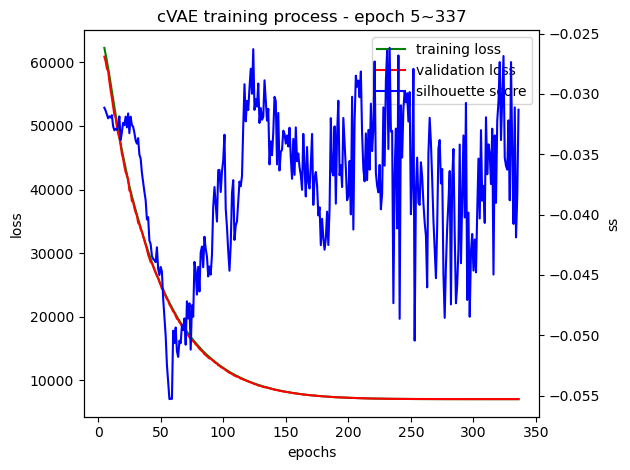

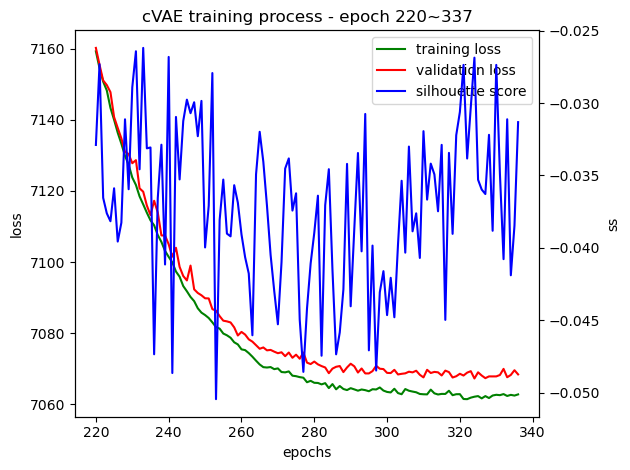

In [11]:
## ---------------------------------------------------------------
left = 5
right = max_epoch

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 220
right = max_epoch

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## train/val

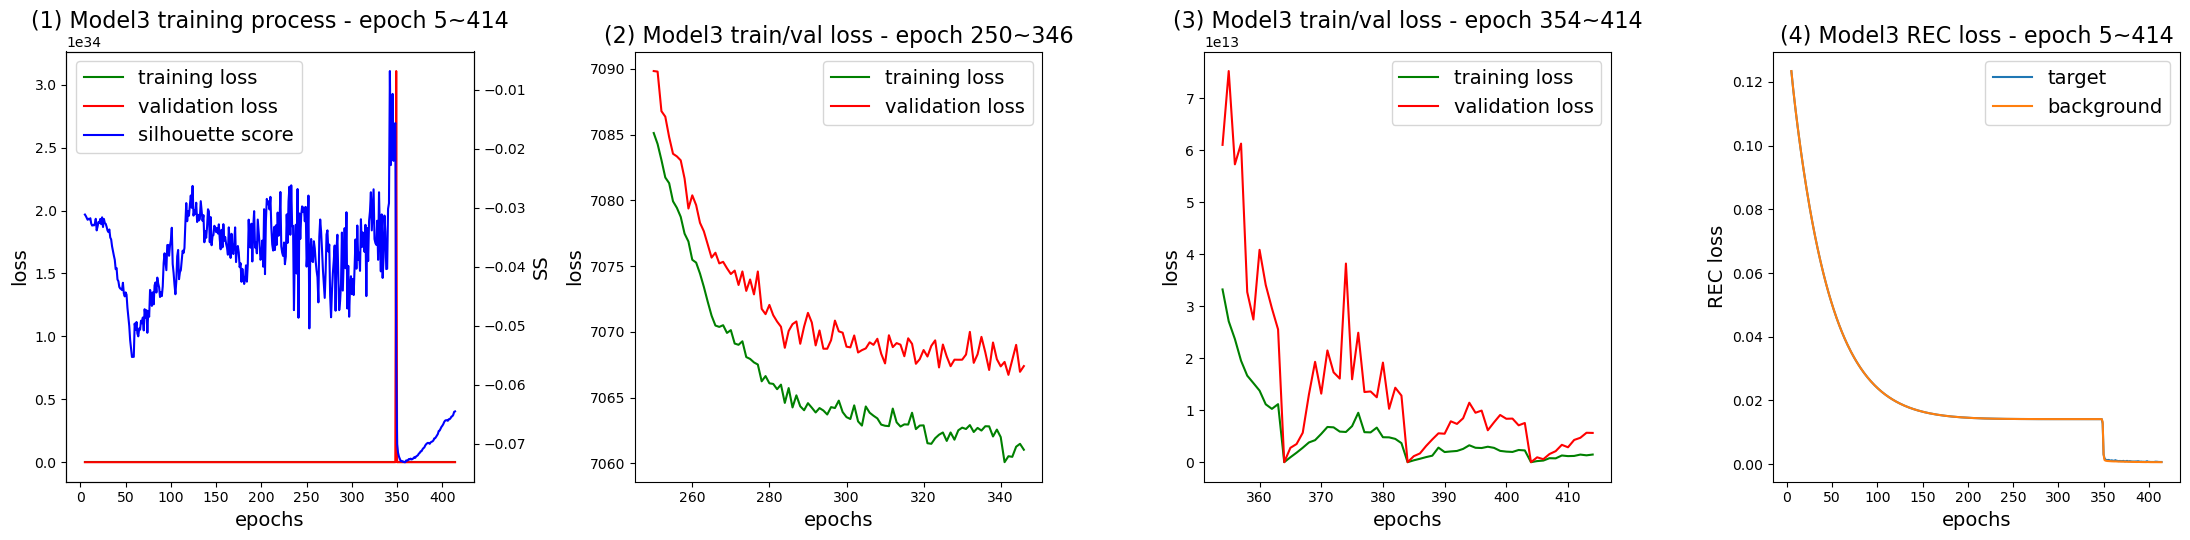

In [12]:
fig, (ax1,ax2,ax3, ax5) = plt.subplots(1,4,figsize=(22,5.5))
title_size = 16
label_size = 14
legend_size = 14

left = 5
right = len(epochs)
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss', fontsize=label_size)
ax1.set_xlabel('epochs', fontsize=label_size)
ax4 = ax1.twinx()
lns3 = ax4.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax4.set_ylabel('SS', fontsize=label_size)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, fontsize=legend_size)
plt.title(f'(1) Model3 training process - epoch {left}~{right-1}', fontsize=title_size)

left = 250
right = 347
ax2.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax2.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax2.set_ylabel('loss', fontsize=label_size)
ax2.set_xlabel('epochs', fontsize=label_size)
ax2.legend(fontsize=legend_size)
ax2.set_title(f'(2) Model3 train/val loss - epoch {left}~{right-1}', fontsize=title_size)

left = 354
right = len(epochs)
ax3.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax3.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax3.set_ylabel('loss', fontsize=label_size)
ax3.set_xlabel('epochs', fontsize=label_size)
ax3.legend(fontsize=legend_size)
ax3.set_title(f'(3) Model3 train/val loss - epoch {left}~{right-1}', fontsize=title_size)

left = 5
right = len(epochs)
ax5.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'target')
ax5.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'background')
ax5.set_title(f'(4) Model3 REC loss - epoch {left}~{right-1}', fontsize=title_size)
ax5.set_xlabel("epochs", fontsize=label_size)
ax5.set_ylabel("REC loss", fontsize=label_size)
ax5.legend(fontsize=legend_size)


fig.tight_layout()
plt.savefig("./analysis/Model3-loss-REC.png")
plt.show()

## Train loss

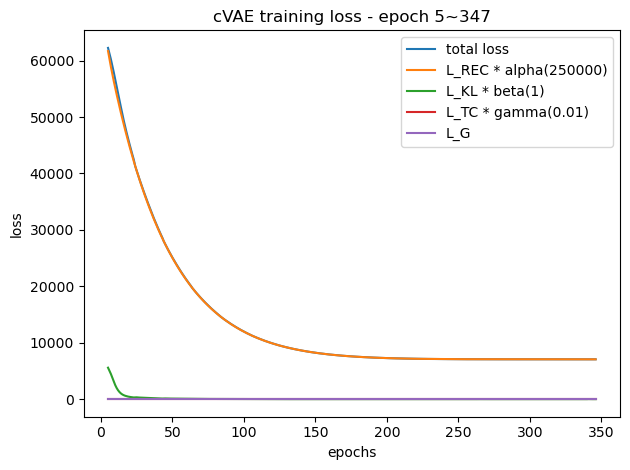

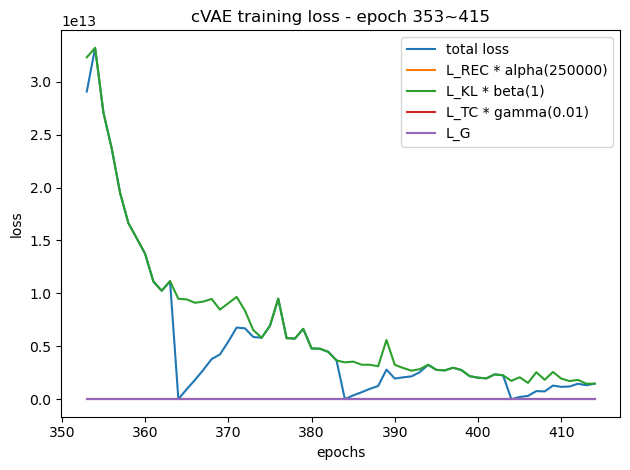

In [13]:
# alpha=1
# beta=1
# gamma=0.01

left = 5
right = 347
## 'loss'
plt.plot(epochs[left:right], train_history["loss"][left:right] , label='total loss')

## "reconst_loss", alpha=250000
## 'reconst_loss_tg', 'reconst_loss_bg'
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right] / (160 * 192 * 160) , label='reconst_train')
plt.plot(epochs[left:right], alpha * np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC * alpha({alpha})')

## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'
plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label='beta * KL_s_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label='beta * KL_z_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label='beta * KL_z_bg')

## 'TC_loss', gamma=100
# plt.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC_train')
plt.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})')

## 'discriminator_loss'
plt.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')

plt.title(f'cVAE training loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()

## ---------------------------------
left = 353
right = len(epochs)
## 'loss'
plt.plot(epochs[left:right], train_history["loss"][left:right] , label='total loss')

## "reconst_loss", alpha=250000
## 'reconst_loss_tg', 'reconst_loss_bg'
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right] / (160 * 192 * 160) , label='reconst_train')
plt.plot(epochs[left:right], alpha * np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC * alpha({alpha})')

## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'
plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label='beta * KL_s_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label='beta * KL_z_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label='beta * KL_z_bg')

## 'TC_loss', gamma=100
# plt.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC_train')
plt.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})')

## 'discriminator_loss'
plt.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')

plt.title(f'cVAE training loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()

## Train REC loss

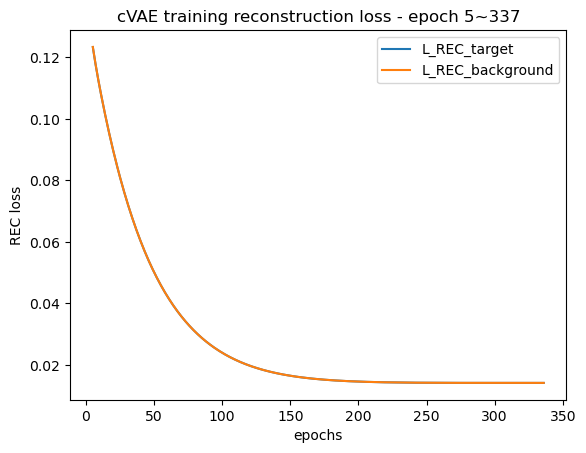

In [14]:
## "reconst_loss", alpha=1
## 'reconst_loss_tg', 'reconst_loss_bg'

## ---------------------------------------------------------------
left = 5
right = max_epoch

#plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
# left = 175
# right = 200

# #plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

# plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
# plt.xlabel("epochs")
# plt.ylabel("REC loss")
# plt.legend()

# fig.tight_layout()
# plt.show()

In [15]:
print(np.array(train_history["reconst_loss_tg"])[0] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[-1] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[246] /  (160 * 192 * 160))

0.15137271881103515
0.0006626203656196594
0.014174071947733562


## Train KL loss

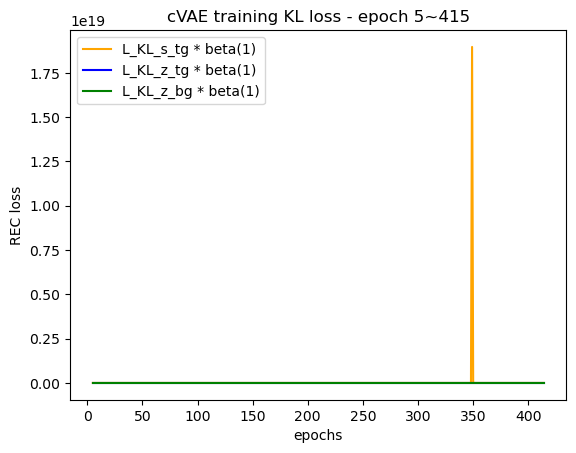

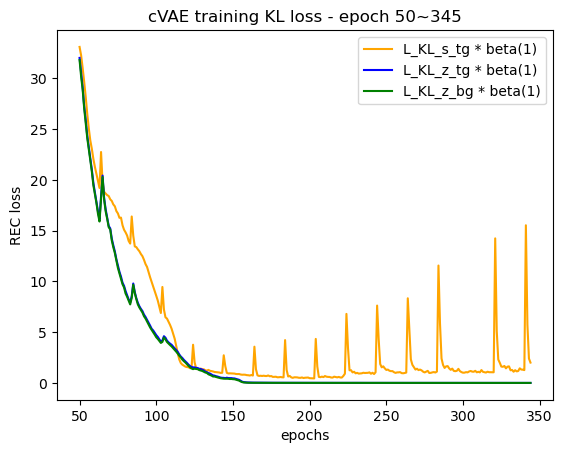

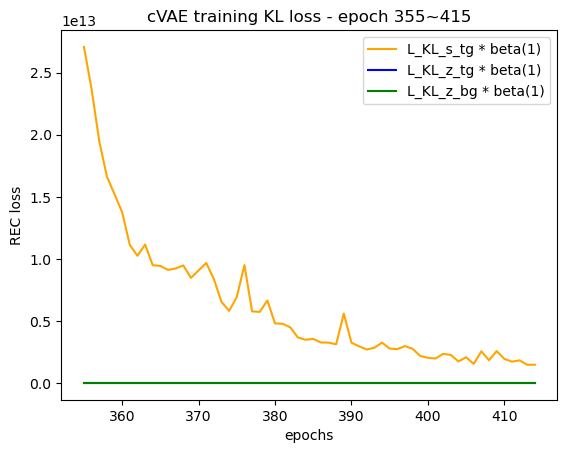

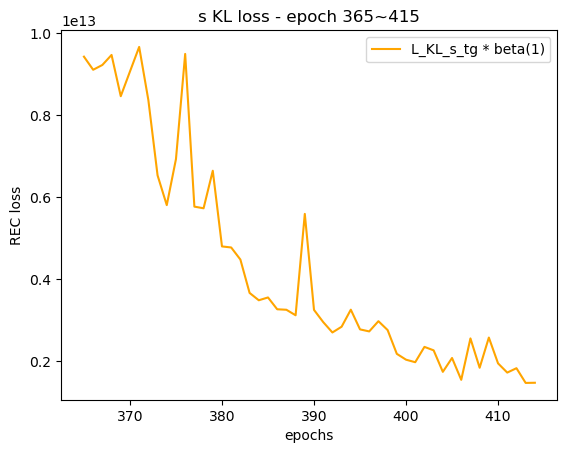

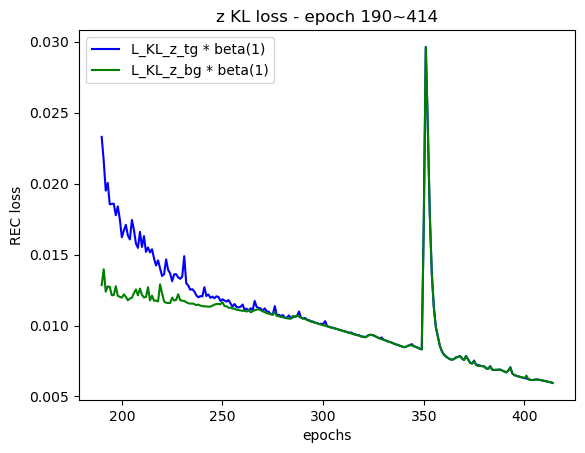

In [16]:
## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'cVAE training KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 50
right = 345
plt.title(f'cVAE training KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 355
right = len(epochs)
plt.title(f'cVAE training KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 365
right = len(epochs)
plt.title(f's KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

# plt.ylim(0,3)

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 190
right = len(epochs)
plt.title(f'z KL loss - epoch {left}~{right-1}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
#plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()



In [17]:
np.array(train_history["KL_s_tg"])[315:].max()

1.896027317848559e+19

In [18]:
((np.array(train_history["KL_z_tg"])+np.array(train_history["KL_z_bg"])) / 2)[315:].max()

0.02963155508041382

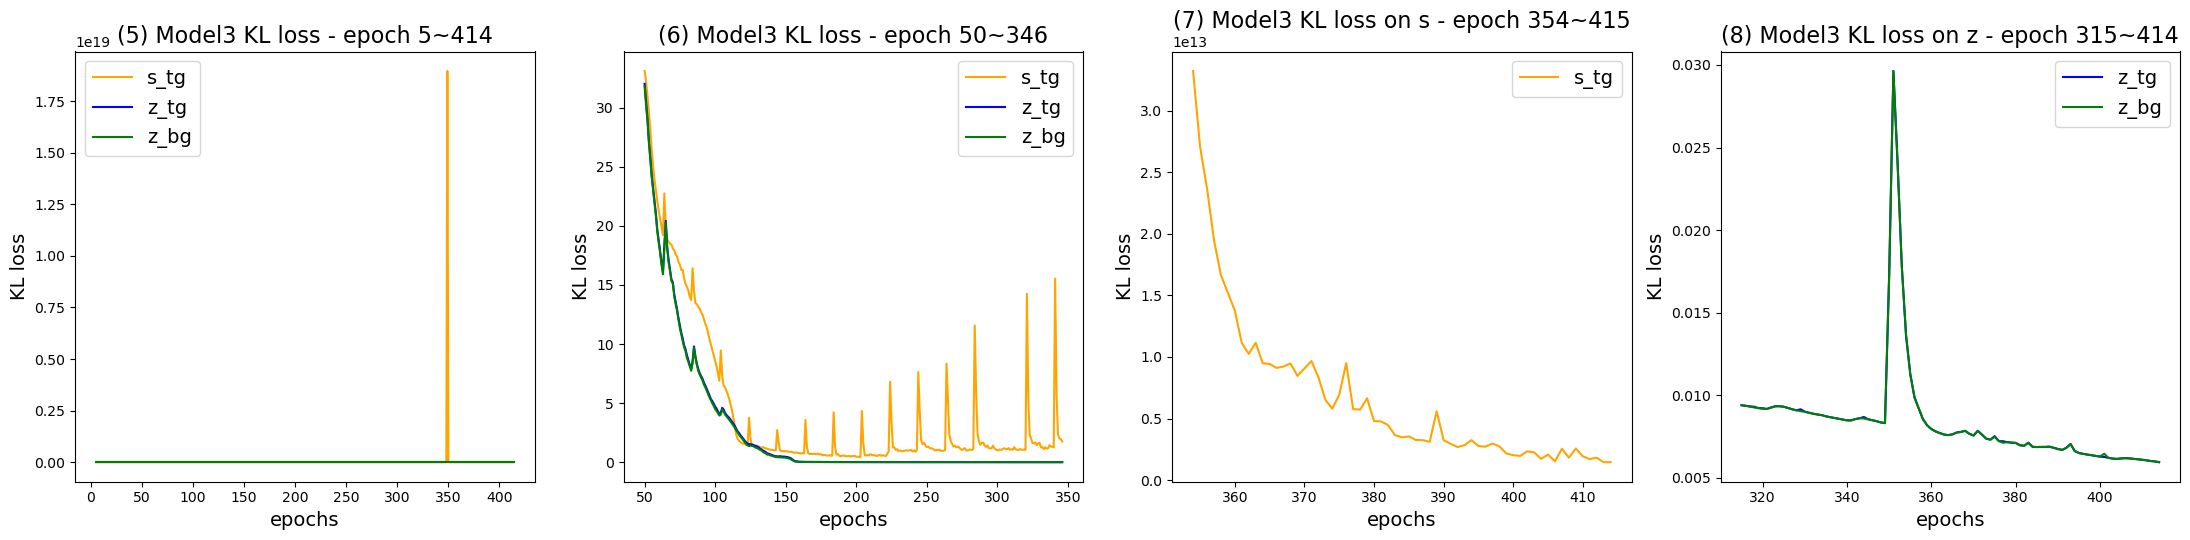

In [19]:
fig, (ax1, ax2, ax4, ax3) = plt.subplots(1,4,figsize=(22,5.5))
title_size = 16
label_size = 14
legend_size = 14

left = 5
right = len(epochs)
ax1.set_title(f'(5) Model3 KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax1.set_xlabel("epochs", fontsize=label_size)
ax1.set_ylabel("KL loss", fontsize=label_size)
ax1.legend(fontsize=legend_size)

left = 50
right = 347
ax2.set_title(f'(6) Model3 KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax2.set_xlabel("epochs", fontsize=label_size)
ax2.set_ylabel("KL loss", fontsize=label_size)
ax2.legend(fontsize=legend_size)

left = 354
right = len(epochs)
ax4.set_title(f'(7) Model3 KL loss on s - epoch {left}~{right}', fontsize=title_size)
ax4.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax4.set_xlabel("epochs", fontsize=label_size)
ax4.set_ylabel("KL loss", fontsize=label_size)
ax4.legend(fontsize=legend_size)

left = 315
right = len(epochs)
ax3.set_title(f'(8) Model3 KL loss on z - epoch {left}~{right-1}', fontsize=title_size)
ax3.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax3.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax3.set_xlabel("epochs", fontsize=label_size)
ax3.set_ylabel("KL loss", fontsize=label_size)
ax3.legend(fontsize=legend_size)

fig.tight_layout()
plt.savefig("./analysis/Model3-KL.png")
plt.show()

In [20]:
print(np.array(train_history["KL_s_tg"])[340:])

[1.26786256e+00 1.55293198e+01 5.72984982e+00 2.40543270e+00
 2.01034284e+00 1.95965242e+00 1.76505423e+00 1.71409011e+00
 2.36339521e+00 1.89602732e+19 1.19921178e+16 6.40999290e+13
 5.51323812e+13 3.23154262e+13 3.32049752e+13 2.70799324e+13
 2.36768943e+13 1.94975493e+13 1.66348068e+13 1.52059249e+13
 1.37541903e+13 1.11227196e+13 1.02469395e+13 1.11511066e+13
 9.48832305e+12 9.42982509e+12 9.10985318e+12 9.22672221e+12
 9.47195793e+12 8.46428163e+12 9.06686471e+12 9.66788330e+12
 8.36873014e+12 6.53077669e+12 5.80390276e+12 6.92944948e+12
 9.49688887e+12 5.76711767e+12 5.72663267e+12 6.64389026e+12
 4.79497971e+12 4.76930533e+12 4.47438180e+12 3.65940546e+12
 3.47974323e+12 3.54857779e+12 3.25999526e+12 3.24789259e+12
 3.11337524e+12 5.58959375e+12 3.24464935e+12 2.94696806e+12
 2.69329577e+12 2.83354700e+12 3.24991713e+12 2.76864067e+12
 2.71914421e+12 2.96871631e+12 2.75214185e+12 2.17113009e+12
 2.02850252e+12 1.96677455e+12 2.34112523e+12 2.25691723e+12
 1.73153636e+12 2.069968

## Train TC + G loss

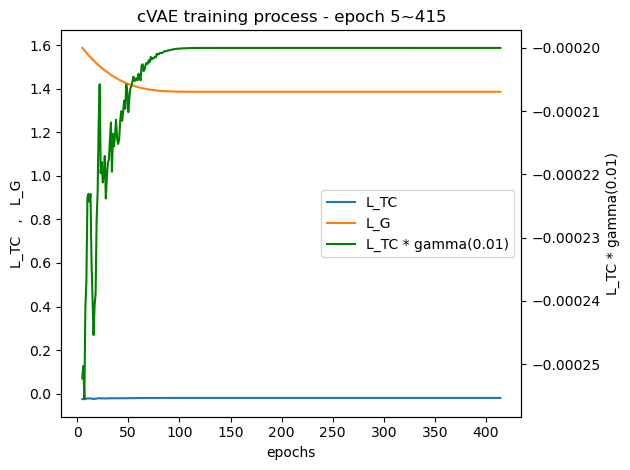

In [21]:
## 'TC_loss', gamma=1
## 'discriminator_loss'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'L_TC   ,   L_G')

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})', color='g')
ax2.set_ylabel(f'L_TC * gamma({gamma})')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

In [22]:
print(train_history["discriminator_loss"][0])
print(train_history["TC_loss"][0])

1.6181095838546753
-0.004733504727482796


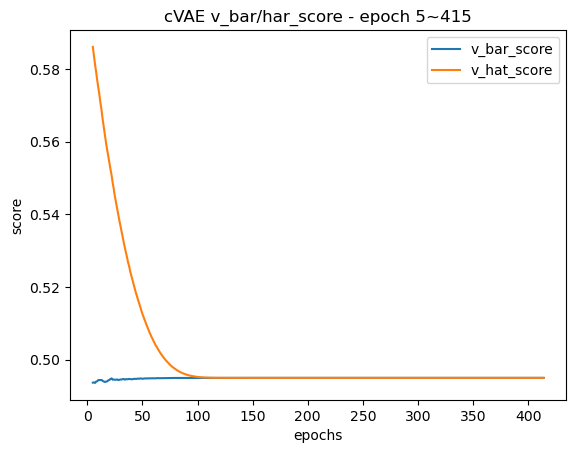

In [23]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score')
plt.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score')

plt.title(f'cVAE v_bar/har_score - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

**cVAE just force v_har_sc

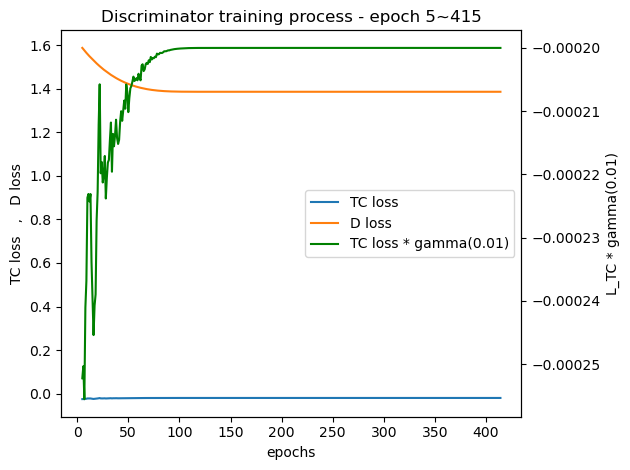

In [24]:
## 'TC_loss', gamma=1
## 'discriminator_loss'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC loss')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='D loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'TC loss   ,   D loss')

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'TC loss * gamma({gamma})', color='g')
ax2.set_ylabel(f'L_TC * gamma({gamma})')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'Discriminator training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.savefig("./teams/disc.png")
plt.show()

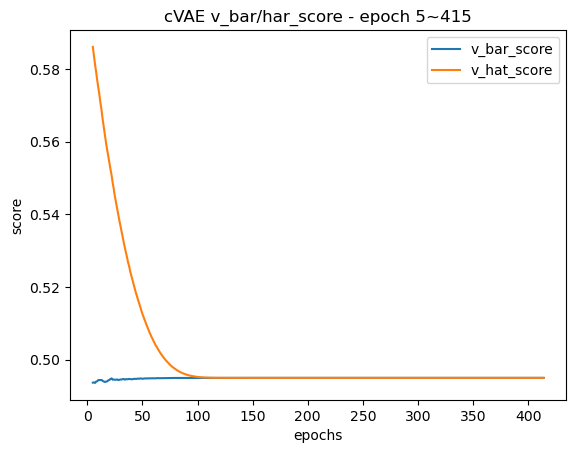

In [25]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score')
plt.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score')

plt.title(f'cVAE v_bar/har_score - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

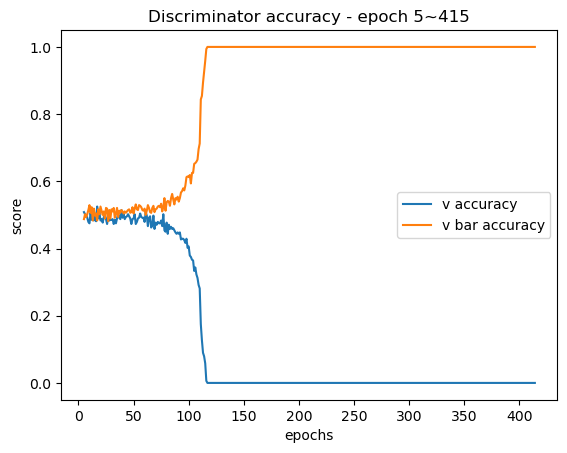

In [26]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], train_history["v_acc"][left:right], label=f'v accuracy')
plt.plot(epochs[left:right], train_history["v_bar_acc"][left:right], label=f'v bar accuracy')

plt.title(f'Discriminator accuracy - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

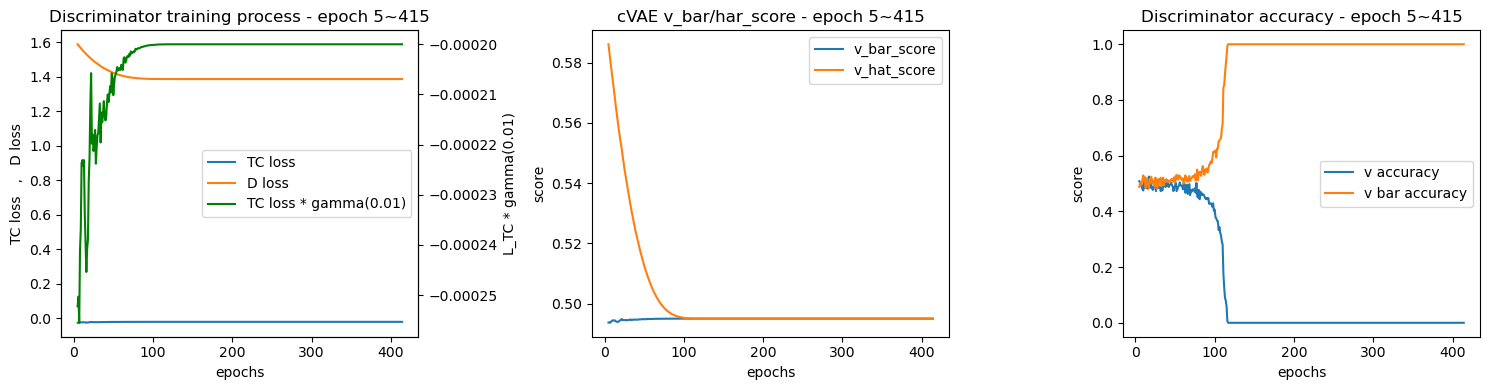

In [27]:
left = 5
right = len(epochs)

fig, (ax1, ax3, ax4) = plt.subplots(1,3,figsize=(15,4))

## tc / D loss
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC loss')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='D loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'TC loss   ,   D loss')

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'TC loss * gamma({gamma})', color='g')
ax2.set_ylabel(f'L_TC * gamma({gamma})')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

ax1.set_title(f'Discriminator training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

## v / v_bar score
ax3.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score')
ax3.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score')

ax3.set_title(f'cVAE v_bar/har_score - epoch {left}~{right}')
ax3.set_xlabel("epochs")
ax3.set_ylabel("score")
ax3.legend()

## acc
left = 5
right = len(epochs)

ax4.plot(epochs[left:right], train_history["v_acc"][left:right], label=f'v accuracy')
ax4.plot(epochs[left:right], train_history["v_bar_acc"][left:right], label=f'v bar accuracy')

ax4.set_title(f'Discriminator accuracy - epoch {left}~{right}')
ax4.set_xlabel("epochs")
ax4.set_ylabel("score")
ax4.legend()

##
fig.tight_layout()
plt.savefig("./teams/disc.png")
plt.show()

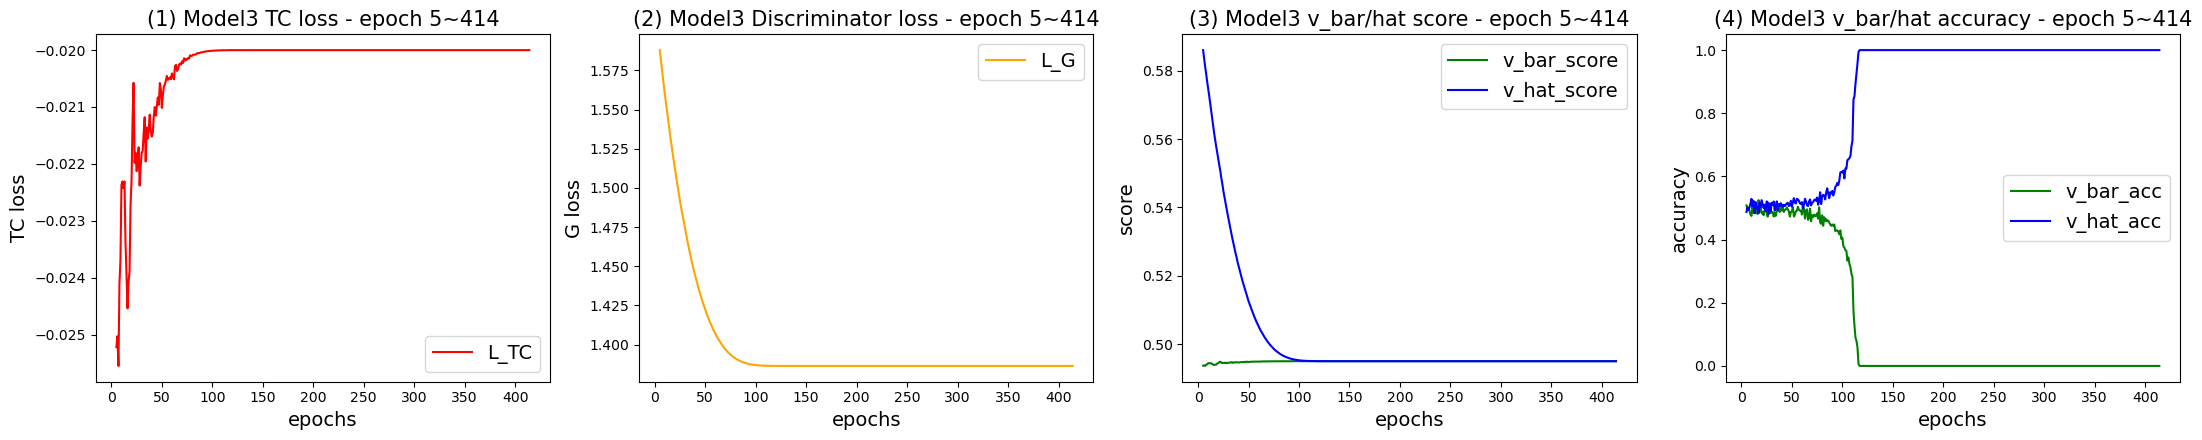

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(22, 4.5))
title_size = 15
label_size = 14
legend_size = 14

## tc loss
left = 5
right = len(epochs)
ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC', color='red')
ax1.set_xlabel('epochs', fontsize=label_size)
ax1.set_ylabel(f'TC loss', fontsize=label_size)
ax1.legend(fontsize=legend_size)
ax1.set_title(f'(1) Model3 TC loss - epoch {left}~{right-1}', fontsize=title_size)

## G loss
left = 5
right = len(epochs)
ax2.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G', color='orange')
ax2.set_xlabel('epochs', fontsize=label_size)
ax2.set_ylabel(f'G loss', fontsize=label_size)
ax2.legend(fontsize=legend_size)
ax2.set_title(f'(2) Model3 Discriminator loss - epoch {left}~{right-1}', fontsize=title_size)

## v / v_bar score
left = 5
right = len(epochs)
ax3.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score', color='green')
ax3.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score', color='blue')
ax3.set_title(f'(3) Model3 v_bar/hat score - epoch {left}~{right-1}', fontsize=title_size)
ax3.set_xlabel("epochs", fontsize=label_size)
ax3.set_ylabel("score", fontsize=label_size)
ax3.legend(fontsize=legend_size)

## acc
left = 5
right = len(epochs)
ax4.plot(epochs[left:right], train_history["v_acc"][left:right], label=f'v_bar_acc', color='green')
ax4.plot(epochs[left:right], train_history["v_bar_acc"][left:right], label=f'v_hat_acc', color='blue')
ax4.set_title(f'(4) Model3 v_bar/hat accuracy - epoch {left}~{right-1}', fontsize=title_size)
ax4.set_xlabel("epochs", fontsize=label_size)
ax4.set_ylabel("accuracy", fontsize=label_size)
ax4.legend(fontsize=legend_size)

##
fig.tight_layout()
plt.savefig("./analysis/Model3-G.png")
plt.show()